In [1]:
import pandas as pd
from datetime import datetime
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import numpy as np

c:\Users\maria\.conda\envs\embeddings\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 20,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 18,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (20, 8),
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'font.family': 'Times New Roman',
    'legend.fontsize': 13,
    'legend.framealpha': 0.8,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

In [3]:
file_path = '../Datasets/Processed/ETL/ETL2_Twi20_profile.parquet'

df = pd.read_parquet(file_path)

In [4]:
df.dtypes

ID                                            object
name                                          object
screen_name                                   object
location                                      object
description                                   object
protected                                       bool
followers_count                               object
friends_count                                 object
listed_count                                  object
favourites_count                              object
statuses_count                                object
created_at                            datetime64[us]
geo_enabled                                     bool
verified                                        bool
profile_background_color                      object
profile_background_image_url_https            object
profile_image_url_https                       object
profile_link_color                            object
profile_sidebar_border_color                  

In [ ]:
df['created_at']

0       Tue Nov 18 10:27:25 +0000 2008 
1       Sun Aug 23 07:35:11 +0000 2020 
2       Thu Nov 27 18:47:32 +0000 2008 
3       Wed Aug 06 15:12:10 +0000 2008 
4       Sat Aug 10 03:25:35 +0000 2013 
                     ...               
9456    Mon Jan 02 06:17:32 +0000 2012 
9457    Fri Apr 07 19:51:10 +0000 2017 
9458    Wed Nov 20 12:36:56 +0000 2013 
9459    Sun Nov 11 06:42:25 +0000 2012 
9460    Tue Jul 21 01:46:13 +0000 2015 
Name: created_at, Length: 9461, dtype: object

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])

df['created_at'] = df['created_at'].dt.tz_localize(None)

df['account_age_days'] = (datetime.now() - df['created_at']).dt.days

df['account_age_years'] = df['account_age_days'] / 365

print(df[['created_at', 'account_age_days', 'account_age_years']])

              created_at  account_age_days  account_age_years
0    2008-11-18 10:27:25              5657          15.498630
1    2020-08-23 07:35:11              1361           3.728767
2    2008-11-27 18:47:32              5648          15.473973
3    2008-08-06 15:12:10              5761          15.783562
4    2013-08-10 03:25:35              3931          10.769863
...                  ...               ...                ...
9456 2012-01-02 06:17:32              4517          12.375342
9457 2017-04-07 19:51:10              2595           7.109589
9458 2013-11-20 12:36:56              3829          10.490411
9459 2012-11-11 06:42:25              4203          11.515068
9460 2015-07-21 01:46:13              3221           8.824658

[9461 rows x 3 columns]


In [6]:
# Converting each column to int64 using the to_numeric() method
# errors='coerce' will transform values that cannot be converted into NaN
df['followers_count'] = pd.to_numeric(df['followers_count'], errors='coerce')
df['friends_count'] = pd.to_numeric(df['friends_count'], errors='coerce')
df['listed_count'] = pd.to_numeric(df['listed_count'], errors='coerce')
df['favourites_count'] = pd.to_numeric(df['favourites_count'], errors='coerce')
df['statuses_count'] = pd.to_numeric(df['statuses_count'], errors='coerce')

df.fillna(0, inplace=True)

# To ensure the values are int64:
df['followers_count'] = df['followers_count'].astype('int64')
df['friends_count'] = df['friends_count'].astype('int64')
df['listed_count'] = df['listed_count'].astype('int64')
df['favourites_count'] = df['favourites_count'].astype('int64')
df['statuses_count'] = df['statuses_count'].astype('int64')

In [ ]:
df.dtypes

ID                                            object
name                                          object
screen_name                                   object
location                                      object
description                                   object
protected                                       bool
followers_count                                int64
friends_count                                  int64
listed_count                                   int64
favourites_count                               int64
statuses_count                                 int64
created_at                            datetime64[ns]
geo_enabled                                     bool
verified                                        bool
profile_background_color                      object
profile_background_image_url_https            object
profile_image_url_https                       object
profile_link_color                            object
profile_sidebar_border_color                  

In [7]:
df_cat = df[['name', 'screen_name','location','description', 'domain']]

In [ ]:
df_cat

,name,screen_name,location,description,domain
0,SHAQ,SHAQ,"Orlando, FL","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...","Politics, Business, Entertainment"
1,Jennifer Fishpaw,JenniferFishpaw,0,,Politics
2,Brad Parscale,parscale,Florida,Owner @ Parscale Strategy. Senior Advisor Digi...,"Politics, Entertainment, Sports"
3,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",Bringing you the important stuff like breaking...,Politics
4,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,Politics
...,...,...,...,...,...
9456,Alan Reifman,AlanReifman,"Lubbock, Texas",Texas Tech professor of human devt and family ...,Sports
9457,Junk Wax Investment Services ($19.99 Per Month),CardsFromAttic,JunkWaxSylvania,Satirizing the sports card industry one tweet ...,Sports
9458,B,bkgreen09,United States,,Sports
9459,bilal koç,bilalko14,0,,Sports


## Checking how many characters are in each description

C:\Users\maria\AppData\Local\Temp\ipykernel_13484\2621056088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['description_length'] = df_cat['description'].apply(len)


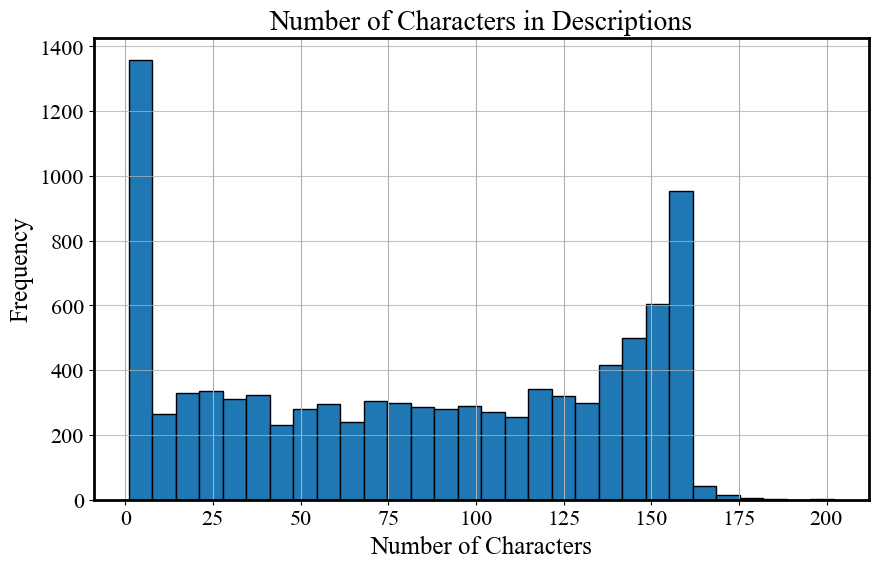

In [8]:
# Calculate the length of each description
df_cat['description_length'] = df_cat['description'].apply(len)

# Plot a histogram of the description lengths
plt.figure(figsize=(10,6))
plt.hist(df_cat['description_length'], bins=30, edgecolor='black')
plt.title('Number of Characters in Descriptions')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

The number of tokens after tokenization by BERT is greater than the number of characters due to the way words are split into subwords or individual symbols. However, it is unlikely that most descriptions will reach the 512 token limit unless they contain a significant amount of complex text or many emojis that are split into multiple tokens.

C:\Users\maria\AppData\Local\Temp\ipykernel_13484\4015522426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['name_length'] = df_cat['name'].apply(len)


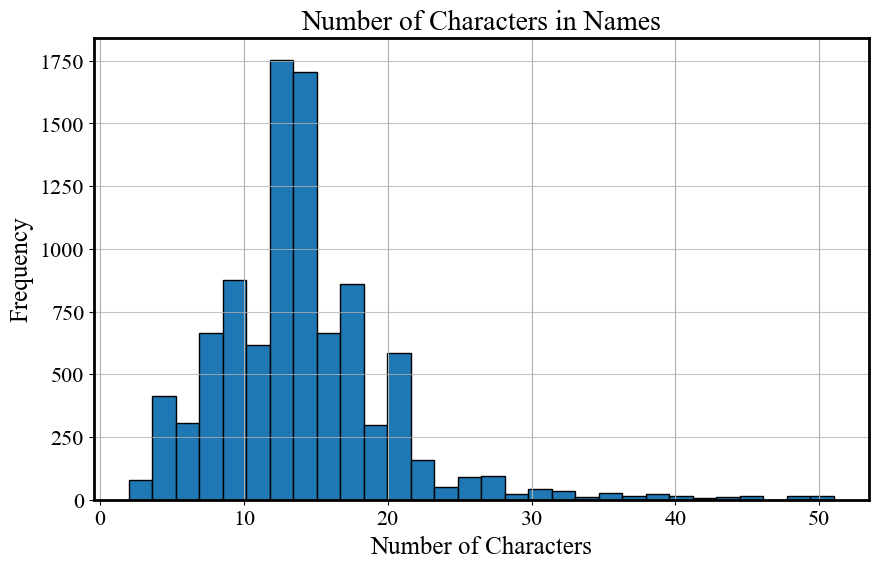

In [9]:
# Calculate the length of each name
df_cat['name_length'] = df_cat['name'].apply(len)

# Plot a histogram of the name lengths
plt.figure(figsize=(10,6))
plt.hist(df_cat['name_length'], bins=30, edgecolor='black')
plt.title('Number of Characters in Names')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_13484\1729522844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['screen_name_length'] = df_cat['screen_name'].apply(len)


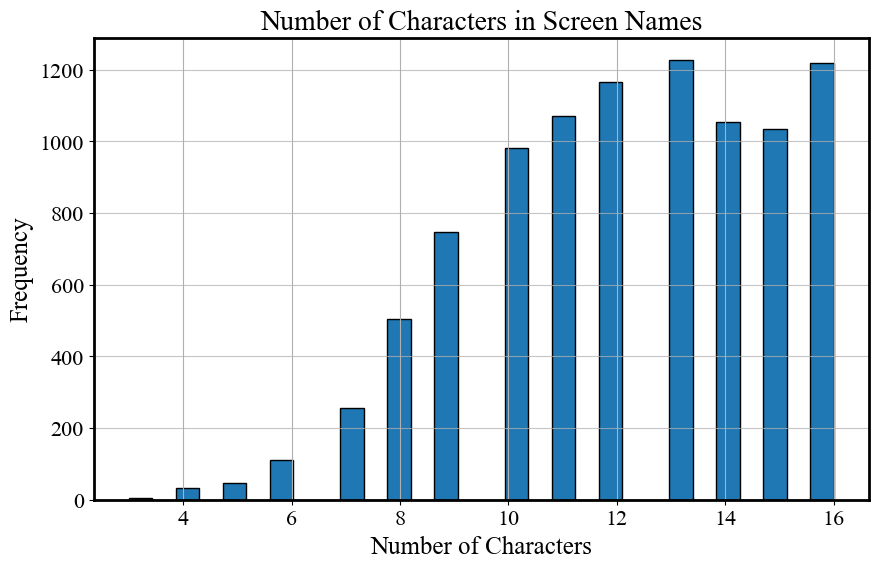

In [10]:
# Calculate the length of each screen name
df_cat['screen_name_length'] = df_cat['screen_name'].apply(len)

# Plot a histogram of the screen name lengths
plt.figure(figsize=(10,6))
plt.hist(df_cat['screen_name_length'], bins=30, edgecolor='black')
plt.title('Number of Characters in Screen Names')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

# 1. Load the BERT Model and Tokenizer

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

c:\Users\maria\.conda\envs\embeddings\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\maria\.conda\envs\embeddings\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\maria\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an ad

# 2. Tokenize and Encode the texts

In [13]:
df_cat['description'].iloc[4]

'MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ & ‘You Know How I’m Coming’ Available now on ALL PLATFORMS '

In [14]:
# Tokenize a single description from the 'description' column
tokens = tokenizer.encode(df_cat['description'].iloc[4], add_special_tokens=True)

# Count the number of tokens
num_tokens = len(tokens)

# Display the number of tokens
print(num_tokens)

29


In [15]:
# Find the longest description in the DataFrame
longest_description_idx = df_cat['description'].str.len().idxmax()

# Display the longest description
longest_description_text = df_cat.loc[longest_description_idx, 'description']
longest_description_text

'Connect with us: https://t.co/KutvmyZvHg ‣ https://t.co/fghwZbOlPK ‣ https://t.co/GFFXHm94oB ‣ https://t.co/g1N5CvXPsH ‣ https://t.co/IuSI5PeYWc ‣ https://t.co/ssJ7fmpSEc | ✉️ partners@cloud9.gg #C9WIN '

In [16]:
# Find the longest description index
longest_description_index = df_cat['description'].str.len().idxmax()
longest_description_index

5520

In [17]:
# Tokenize a single description from the 'description' column
tokens = tokenizer.encode(df_cat['description'].iloc[5520], add_special_tokens=True)

# Count the number of tokens
num_tokens = len(tokens)

# Display the number of tokens
print(num_tokens)

114


In [18]:
# Find the longest name in the DataFrame
longest_name_idx = df_cat['name'].str.len().idxmax()

# Display the longest name
longest_name_text = df_cat.loc[longest_name_idx, 'name']
longest_name_text

'Donald J. Trump ........................... ᵖᵃʳᵒᵈʸ '

In [19]:
# Find the index of the longest name in the DataFrame
longest_name_index = df_cat['name'].str.len().idxmax()
longest_name_index

48

In [20]:
# Tokenize a single description from the 'name' column
tokens = tokenizer.encode(df_cat['name'].iloc[48], add_special_tokens=True)

# Count the number of tokens
num_tokens = len(tokens)

# Display the number of tokens
print(num_tokens)

39


In [21]:
# Find the longest screen name in the DataFrame
longest_screen_name_idx = df_cat['screen_name'].str.len().idxmax()

# Display the longest screen name
longest_screen_name_text = df_cat.loc[longest_screen_name_idx, 'screen_name']
longest_screen_name_text

'JenniferFishpaw '

In [22]:
# Tokenize a single screen name from the 'screen_name' column
tokens = tokenizer.encode(df_cat['screen_name'].iloc[48], add_special_tokens=True)

# Count the number of tokens
num_tokens = len(tokens)

# Display the number of tokens
print(num_tokens)

7


In [23]:
token_counts = [len(tokenizer.encode(description, add_special_tokens=True)) for description in df_cat['screen_name']]

# Calculate statistical metrics from the embeddings
average_tokens = np.mean(token_counts)
median_tokens = np.median(token_counts)
percentile_95 = np.percentile(token_counts, 95)

# Decide on a max_length
# For example, choose the greater of the median and the 95th percentile
max_length = int(max(median_tokens, percentile_95))

print(f'Average number of tokens: {average_tokens}')
print(f'Median number of tokens: {median_tokens}')
print(f'95th percentile of tokens: {percentile_95}')
print(f'Suggested maximum length: {max_length}')

Average number of tokens: 6.2741782052637145
Median number of tokens: 6.0
95th percentile of tokens: 9.0
Suggested maximum length: 9


In [ ]:
# Attention: BERT has a maximum token size, which is typically 512 tokens.
# tokenizer.encode() returns only the input_ids.
# Calling the tokenizer with return_tensors='pt' can return a complete dictionary, including input_ids, attention_mask, and token_type_ids.
# All these keys are already associated with tensors that are correctly formatted to be used as input for the BERT model.

#inputs = tokenizer(df_cat['description'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=115)
#inputs = tokenizer(df_cat['name'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=45)
inputs = tokenizer(df_cat['screen_name'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=10)

In [ ]:
inputs

{'input_ids': tensor([[  101, 21146,  4160,  ...,     0,     0,     0],
        [  101,  7673,  7529,  ...,     0,     0,     0],
        [  101, 11968, 15782,  ...,     0,     0,     0],
        ...,
        [  101, 23923, 28637,  ...,     0,     0,     0],
        [  101, 12170, 13837,  ...,     0,     0,     0],
        [  101,  2065, 29337,  ...,   102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 0, 0]])}

# 3. Put the model in evaluation mode

Putting a neural network model in "evaluation mode" is a common practice in deep learning inference. This is done to disable specific behaviors that are only used during model training, such as dropout and batch normalization layers.

In PyTorch, this is done with the .eval() method applied to the model. Here are the main effects:

- Disables Dropout: During training, dropout is used to prevent overfitting by randomly "turning off" some neurons in the network. During evaluation or inference, you want to use all neurons, so dropout is disabled.

- Disables Batch Normalization: During training, batch normalization layers adjust their statistics based on the input data. During evaluation, these layers use running statistics accumulated during training instead of the current batch statistics.

In [ ]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

# 4. Pass the tokens through the BERT model to get the embeddings

In [ ]:
# Disable gradient calculation to save memory and speed up
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
# Extracting the [CLS] token embeddings for all descriptions
cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

In [ ]:
cls_embeddings.shape

(9461, 768)

In [ ]:
#cls_descriptions_embeddings = pd.DataFrame(cls_embeddings)

# Path where you want to save the .parquet file
#output_path = 'Datasets/Processed/BERT_output/cls_description_embeddings.parquet'

#cls_descriptions_embeddings.columns = [f'feature_{i}' for i in range(cls_descriptions_embeddings.shape[1])]

# Save the DataFrame as a .parquet file
#cls_descriptions_embeddings.to_parquet(output_path)

In [ ]:
#cls_name_embeddings = pd.DataFrame(cls_embeddings)

# Path where you want to save the .parquet file
#output_path = 'Datasets/Processed/BERT_output/cls_name_embeddings.parquet'

#cls_name_embeddings.columns = [f'feature_{i}' for i in range(cls_name_embeddings.shape[1])]

# Save the DataFrame as a .parquet file
#cls_name_embeddings.to_parquet(output_path)


In [ ]:
cls_screen_name_embeddings = pd.DataFrame(cls_embeddings)

# Path where you want to save the .parquet file
output_path = 'Datasets/Processed/BERT_output/cls_screen_name_embeddings.parquet'


cls_screen_name_embeddings.columns = [f'feature_{i}' for i in range(cls_screen_name_embeddings.shape[1])]

# Save the DataFrame as a .parquet file
cls_screen_name_embeddings.to_parquet(output_path)

In [ ]:
cls_descriptions_embeddings

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,0.047866,0.324545,-0.156737,-0.418447,-0.382889,-0.111810,0.552599,0.414674,0.057406,-0.511013,...,-0.401166,-0.244321,0.107650,-0.270898,0.265879,-0.191746,0.021862,0.037303,0.294094,0.680295
1,-1.053403,-0.417702,-0.374947,-0.195811,-0.042522,-0.169913,0.270010,0.461599,-0.800335,-0.890520,...,0.158835,0.583574,-1.081375,-0.569022,0.808688,-0.241229,-0.506335,-0.373095,-0.382319,0.336901
2,-0.900484,-0.161312,-0.078765,-0.058973,-0.499148,0.138275,0.447187,0.651447,0.214642,-0.174110,...,-0.106389,0.190835,-0.254854,-0.265466,0.361052,-0.076635,-0.323808,-0.179715,0.628502,0.033257
3,-0.317922,-0.280353,-0.120997,0.011691,-0.610115,-0.471136,0.073688,1.111917,-0.034530,-0.135831,...,-0.449931,-0.567182,-0.229894,0.042176,0.345907,0.107749,-0.514781,-0.316684,0.545094,0.087612
4,-0.054135,-0.016440,0.155916,0.111332,-0.114132,-0.208503,0.426685,0.064202,-0.177703,-0.105703,...,0.013689,-0.082182,0.061811,0.128282,0.151663,-0.132087,-0.024841,-0.087614,0.077337,0.054222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,-0.687201,-0.149218,-0.529270,-0.332964,-0.117172,0.281195,0.041444,0.623207,-0.215739,0.159284,...,-0.096822,-0.128830,-0.104369,-0.151581,0.361919,-0.006143,-0.458468,0.154875,0.579372,0.006660
9457,-0.107086,0.041689,-0.142124,0.125603,-0.618873,-0.535812,0.295180,0.781177,0.002774,-0.173850,...,0.032340,-0.129685,-0.411277,-0.329299,0.650395,0.204182,-0.647480,-0.144433,0.171363,0.209822
9458,-1.053403,-0.417702,-0.374947,-0.195811,-0.042522,-0.169913,0.270010,0.461599,-0.800335,-0.890520,...,0.158835,0.583574,-1.081375,-0.569022,0.808688,-0.241229,-0.506335,-0.373095,-0.382319,0.336901
9459,-1.053403,-0.417702,-0.374947,-0.195811,-0.042522,-0.169913,0.270010,0.461599,-0.800335,-0.890520,...,0.158835,0.583574,-1.081375,-0.569022,0.808688,-0.241229,-0.506335,-0.373095,-0.382319,0.336901


In [ ]:
cls_name_embeddings

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,-0.608289,0.127921,-0.352116,-0.254827,-0.475948,-0.176234,0.384800,0.491231,-0.052694,0.185936,...,0.311226,-0.035420,0.117765,0.027135,-0.282105,-0.215232,-0.002873,-0.513130,0.571053,0.414469
1,-0.074249,0.113105,0.058756,0.048741,0.013657,0.053149,0.084992,0.190924,-0.166883,0.089235,...,-0.070373,-0.110431,-0.097151,0.147071,0.282914,-0.076892,-0.031334,-0.109377,0.231434,0.142832
2,-0.091187,-0.103654,0.116783,-0.015307,0.025336,-0.079439,0.138140,0.162064,-0.072441,0.001048,...,-0.033408,-0.091543,0.094464,0.133940,0.196252,-0.052419,-0.056223,-0.145547,0.191042,-0.030538
3,-0.446620,-0.233809,-0.267092,-0.009127,-0.349555,-0.179753,0.201491,0.403979,-0.025302,-0.265282,...,0.175344,-0.001583,0.094553,0.306665,0.109771,-0.189978,-0.125782,-0.084636,0.434021,0.501014
4,-0.213363,0.177400,-0.226553,-0.098783,-0.389183,0.018221,0.448144,0.212993,-0.045768,-0.115280,...,0.299621,-0.242299,-0.020045,0.162189,0.126650,-0.006284,0.101837,-0.274853,0.165182,0.308618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,-0.380505,0.235445,-0.174370,-0.165348,-0.172533,-0.090306,0.208363,0.206373,-0.220689,0.108793,...,0.136709,-0.277911,0.121919,0.178598,-0.017842,0.048707,-0.224618,-0.141702,0.386730,0.299854
9457,-0.263866,0.029661,-0.519070,-0.146870,-0.007928,0.157819,0.305169,0.291101,-0.171678,0.181605,...,-0.143394,-0.032257,0.290734,0.159676,0.541495,0.016046,-0.267097,-0.291768,0.326935,0.411341
9458,-0.731563,-0.323171,-0.399816,-0.110025,0.459382,-0.121886,-0.079141,0.733570,0.049089,-0.756448,...,1.015264,0.652091,0.473833,-0.149974,0.121157,-0.526382,0.147238,0.279160,0.031086,0.427287
9459,-0.663966,0.491669,-0.428547,0.114115,-0.231920,0.675041,0.373847,0.197398,-0.517704,0.015209,...,0.478144,-0.316621,0.402816,-0.364614,0.391611,-0.242347,-0.058650,-0.133275,0.599807,0.169419


In [ ]:
cls_screen_name_embeddings

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,-0.608288,0.127921,-0.352116,-0.254826,-0.475949,-0.176234,0.384799,0.491231,-0.052694,0.185936,...,0.311225,-0.035420,0.117765,0.027135,-0.282106,-0.215233,-0.002873,-0.513130,0.571052,0.414470
1,-0.077168,0.062747,0.067463,0.088846,-0.112997,0.012714,0.194441,0.282199,-0.168667,-0.023638,...,0.093331,-0.168514,-0.086752,0.252432,0.189000,-0.074036,-0.054566,-0.186573,0.176238,0.001524
2,-0.246739,0.064736,0.213870,-0.188704,0.190658,-0.093654,-0.033638,0.300162,-0.151017,-0.073955,...,0.220465,0.026757,0.061846,0.173398,0.199579,-0.183348,0.092377,-0.225850,0.092743,0.237017
3,0.067446,0.067321,-0.115549,-0.012458,-0.206580,-0.281801,0.279086,0.254909,-0.156662,-0.322764,...,0.126113,0.090901,0.058266,-0.010296,0.148042,-0.126589,-0.125517,0.086423,0.276040,0.105180
4,-0.586610,0.176111,-0.124947,-0.169995,-0.103570,-0.075741,0.430677,0.396439,-0.286978,-0.245359,...,0.187584,-0.050237,0.210324,0.086111,0.107487,-0.337147,-0.147249,-0.107036,0.308857,0.560630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,-0.325282,0.160700,-0.077053,-0.250935,-0.236707,-0.010902,0.187434,0.195968,-0.245761,0.047934,...,0.066591,-0.062707,0.089948,0.261075,0.072649,0.048709,-0.388264,-0.279419,0.279535,0.225863
9457,-0.561754,0.046634,0.037644,0.013866,-0.428348,-0.054965,0.194204,0.172763,-0.670530,-0.379288,...,0.407810,-0.176775,0.228774,0.210789,0.193924,0.140962,-0.359819,-0.299671,0.278994,0.572238
9458,-0.648535,0.044509,0.139664,-0.038314,-0.431729,-0.216107,0.389647,0.238344,-0.389975,-0.285775,...,0.152745,0.031398,0.203089,0.212544,0.437500,-0.098595,-0.077863,0.099637,0.186323,0.626741
9459,-0.849340,0.175811,-0.425665,-0.118268,-0.466519,0.117582,0.166115,-0.097184,-0.519200,-0.186542,...,0.306666,0.265593,0.144828,0.228493,0.082559,-0.423169,0.076106,0.107541,0.515203,0.579131
